# Capybara and Jaguar Image Classifier

### Create dataset directory

In [ ]:
!mkdir /content/dataset

### Unzip uploaded images files

In [ ]:
!unzip /content/capibara.zip -d /content/capibara
!unzip /content/jaguar.zip -d /content/jaguar

Archive:  /content/capibara.zip
  inflating: /content/capibara/capibara/01-tik-tok-animals.jpg  
  inflating: /content/capibara/capibara/121790182-close-up-retrato-de-un-lindo-bebC3A9-capibara-hydrochoerus-hydrochaeris.jpg  
  inflating: /content/capibara/capibara/1400x84620HYDHYD202.jpg  
  inflating: /content/capibara/capibara/1588802667-c3.jpg.jpeg  
  inflating: /content/capibara/capibara/220px-Capibara_2_edit.jpg  
  inflating: /content/capibara/capibara/220px-Capybara_harness.jpg  
  inflating: /content/capibara/capibara/514Bpcvt7XL.jpg  
  inflating: /content/capibara/capibara/5797fd5908a1abf2ffbaa45a2fa3dce4-capibara-con-corona-de-flores.png  
  inflating: /content/capibara/capibara/61kIFODOBL.jpg  
  inflating: /content/capibara/capibara/6497143a2885d.jpeg  
  inflating: /content/capibara/capibara/6fqwyt59ce_Medium_WW239177.jpg  
  inflating: /content/capibara/capibara/77-zoo-cuenca.jpg  
  inflating: /content/capibara/capibara/800px-Capivara28Hydrochoerus_hydrochaeris29.jpg  

In [ ]:
!mv /content/capibara/ -t /content/dataset/
!mv /content/jaguar/ -t /content/dataset/

### Import Image Data Generator to load Images

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Create dataset genertor
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 10,
    width_shift_range = 0.15,
    height_shift_range = 0.15,
    shear_range = 5,
    zoom_range = [0.7, 1.3],
    validation_split = 0.2
)

train_data_gen = datagen.flow_from_directory('/content/dataset',
                                             target_size=(224,224),
                                             batch_size=32,
                                             shuffle=True,
                                             subset='training')


test_data_gen = datagen.flow_from_directory('/content/dataset',
                                             target_size=(224,224),
                                             batch_size=32,
                                             shuffle=True,
                                             subset='validation')

Found 765 images belonging to 2 classes.
Found 190 images belonging to 2 classes.


### Show images from dataset created

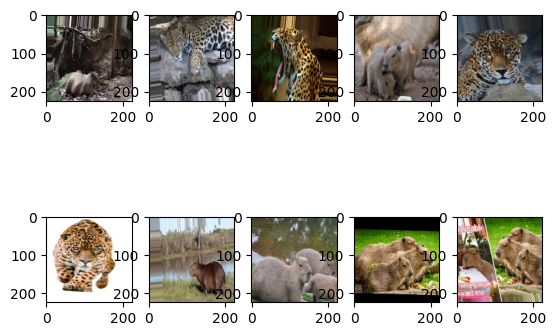

In [ ]:
import matplotlib.pyplot as plt

for image, label in train_data_gen:
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(image[i])
  break
plt.show()

### Import model from tensorflow hub

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

mobilenetv2 = hub.KerasLayer(url, input_shape=(224, 224, 3))

In [ ]:
# Important: freeze layers
mobilenetv2.trainable = False

Create the model and add a last Dense Layer to classify between 2 categories



In [ ]:
model = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(2, activation= 'softmax')
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
epochs = 25
training = model.fit(
    train_data_gen,
    epochs=epochs,
    batch_size=32,
    validation_data=test_data_gen
)

Epoch 1/25
24/24 [==============================] - 28s 686ms/step - loss: 0.2011 - accuracy: 0.9281 - val_loss: 0.0598 - val_accuracy: 0.9789
Epoch 2/25
24/24 [==============================] - 15s 592ms/step - loss: 0.0441 - accuracy: 0.9895 - val_loss: 0.0339 - val_accuracy: 0.9842
Epoch 3/25
24/24 [==============================] - 15s 621ms/step - loss: 0.0272 - accuracy: 0.9895 - val_loss: 0.0353 - val_accuracy: 0.9895
Epoch 4/25
24/24 [==============================] - 16s 692ms/step - loss: 0.0250 - accuracy: 0.9948 - val_loss: 0.0243 - val_accuracy: 0.9895
Epoch 5/25
24/24 [==============================] - 15s 613ms/step - loss: 0.0141 - accuracy: 0.9974 - val_loss: 0.0263 - val_accuracy: 0.9895
Epoch 6/25
24/24 [==============================] - 16s 681ms/step - loss: 0.0121 - accuracy: 0.9974 - val_loss: 0.0361 - val_accuracy: 0.9842
Epoch 7/25
24/24 [==============================] - 14s 607ms/step - loss: 0.0138 - accuracy: 0.9961 - val_loss: 0.0152 - val_accuracy: 0.9947

### Create a function to classify images

In [ ]:
from PIL import Image
import cv2
def to_classify(root):
  img = Image.open(root)
  img = img.convert('RGB')
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224, 224))
  prediction = model.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediction[0], axis=-1)

### Make some predictions

In [ ]:
root = '/content/jaguar.jpeg'

prediction = to_classify(root)
print(prediction)

1/1 [==============================] - 1s 929ms/step
1


In [ ]:
root = '/content/capibara.jpeg'

prediction = to_classify(root)
print(prediction)

1/1 [==============================] - 0s 23ms/step
0
